In [6]:
%cd D:\Projects\mouseMotion_Recognition

D:\Projects\mouseMotion_Recognition


D:\Software\Develop\PythonEnv\anaconda3\envs\mouseMotion_Recognition\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


非常建议在命令行里训练




In [32]:
!yolo classify train data=data/UltralyticsDataset/classify model=yolov8n-cls.pt epochs=10 imgsz=640


Ultralytics YOLOv8.1.37 馃殌 Python-3.10.14 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=data/UltralyticsDataset/classify, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True


train: Scanning D:\Projects\mouseMotion_Recognition\data\UltralyticsDataset\classify\train...:   0%|          | 0/330 [00:00<?, ?it/s]
train: Scanning D:\Projects\mouseMotion_Recognition\data\UltralyticsDataset\classify\train... 189 images, 0 corrupt:  57%|█████▋    | 189/330 [00:00<00:00, 1868.58it/s]
train: Scanning D:\Projects\mouseMotion_Recognition\data\UltralyticsDataset\classify\train... 330 images, 0 corrupt: 100%|██████████| 330/330 [00:00<00:00, 1067.72it/s]

val: Scanning D:\Projects\mouseMotion_Recognition\data\UltralyticsDataset\classify\val...:   0%|          | 0/19 [00:00<?, ?it/s]
val: Scanning D:\Projects\mouseMotion_Recognition\data\UltralyticsDataset\classify\val... 19 images, 0 corrupt: 100%|██████████| 19/19 [00:00<00:00, 860.83it/s]

  0%|          | 0/21 [00:00<?, ?it/s]
       1/10      1.45G     0.7216         16        640:   0%|          | 0/21 [00:08<?, ?it/s]
       1/10      1.45G     0.7216         16        640:   5%|▍         | 1/21 [00:08<02:41,  8.06

In [51]:
from ultralytics import YOLO

model = YOLO('runs/classify/train/weights/best.pt')

In [52]:
results = model([r'Z:\Motion_Recognition\Head Twitch\AIResult\1365-27.3927882024-03-26_13_19_46\8.jpg'])


0: 640x640 HT 1.00, Normal 0.00, 8.5ms
Speed: 31.2ms preprocess, 8.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


In [53]:
print(results[0].names)
for step, result in enumerate(results):
    print(result.probs.top1)

{0: 'HT', 1: 'Normal'}
0


In [54]:
results = model(r"Z:\Motion_Recognition\Head Twitch\largeSlice\output_000.mp4", stream=True, save=True)

for step, result in enumerate(results):
    # print(f"Step {step} Result: {result.probs.top1}")
    pass



video 1/1 (frame 1/35989) Z:\Motion_Recognition\Head Twitch\largeSlice\output_000.mp4: 640x640 Normal 0.98, HT 0.02, 8.5ms
video 1/1 (frame 2/35989) Z:\Motion_Recognition\Head Twitch\largeSlice\output_000.mp4: 640x640 Normal 0.98, HT 0.02, 7.5ms
video 1/1 (frame 3/35989) Z:\Motion_Recognition\Head Twitch\largeSlice\output_000.mp4: 640x640 Normal 0.97, HT 0.03, 7.0ms
video 1/1 (frame 4/35989) Z:\Motion_Recognition\Head Twitch\largeSlice\output_000.mp4: 640x640 Normal 0.99, HT 0.01, 11.5ms
video 1/1 (frame 5/35989) Z:\Motion_Recognition\Head Twitch\largeSlice\output_000.mp4: 640x640 Normal 0.98, HT 0.02, 7.5ms
video 1/1 (frame 6/35989) Z:\Motion_Recognition\Head Twitch\largeSlice\output_000.mp4: 640x640 Normal 1.00, HT 0.00, 7.0ms
video 1/1 (frame 7/35989) Z:\Motion_Recognition\Head Twitch\largeSlice\output_000.mp4: 640x640 Normal 0.98, HT 0.02, 9.5ms
video 1/1 (frame 8/35989) Z:\Motion_Recognition\Head Twitch\largeSlice\output_000.mp4: 640x640 Normal 0.99, HT 0.01, 7.5ms
video 1/1 (fra

KeyboardInterrupt: 

In [39]:
from tqdm import tqdm
import cv2

video_path = r"Z:\Motion_Recognition\Head Twitch\largeSlice\output_000.mp4"

imgsData = []
# 打开视频文件
cap = cv2.VideoCapture(video_path)
# 获取视频的总帧数
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

Counter = 0
# while True:
# for step in tqdm(range(3000)):
for step in range(3000):
    ret, prev_frame = cap.read()
    if not ret:
        break

    Counter += 1
    if Counter < 1000:
        continue

    prev_frame = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2RGB)
    results = model(prev_frame)
    result = results[0]

    if result.probs.top1 == 0:
        print(f"Step {step} Result: {result.probs.top1}")

    # if step%10==0:
    #     for OpticalFlowFeatureMap in OpticalFlowFeatureMapHueHistory:
    #         cv2.imwrite(f"data/OpticalFlowFeatureMap/{step}.png",OpticalFlowFeatureMap)
    #
    #     cleanForOpticalFlow(contiuFlag=True)




0: 640x640 Normal 1.00, HT 0.00, 13.5ms
Speed: 20.5ms preprocess, 13.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 Normal 1.00, HT 0.00, 7.5ms
Speed: 19.0ms preprocess, 7.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 Normal 1.00, HT 0.00, 61.1ms
Speed: 22.1ms preprocess, 61.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 Normal 1.00, HT 0.00, 15.0ms
Speed: 17.0ms preprocess, 15.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 Normal 1.00, HT 0.00, 9.5ms
Speed: 19.6ms preprocess, 9.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 Normal 1.00, HT 0.00, 7.0ms
Speed: 21.0ms preprocess, 7.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 Normal 1.00, HT 0.00, 12.5ms
Speed: 18.5ms preprocess, 12.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 Normal 1.00, HT 0.00,

KeyboardInterrupt: 

## Inference

In [ ]:
!yolo classify predict model=runs/classify/train/weights/best.pt source='data/2/3mgS_m2_h2.avi_20240312_155340.mkv_20240322_115444.019.jpg' > result\log??.txt  # predict with custom model

In [4]:
with open("runs/HTFrameResult.log", "r") as file:
    lines = file.readlines()

lines=lines[3:20000]

In [6]:
lines[3].split(" ")[-5]

'Normal'

In [12]:
classHistory=[line.split(" ")[-5] for line in lines]
classHistory=[0 if classs=='Normal' else 1 for classs in classHistory ]

In [72]:
import numpy as np

data=[]

for step,tag in enumerate(classHistory):
    if tag==1:
        data.append(step)

data=np.array(data)

In [82]:
import plotly.graph_objects as go
import numpy as np

# 生成一维数据
# data = np.array([1, 2, 5, 6, 7, 100, 110, 120])
data=data[:5000]
# 创建Plotly的散点图
fig = go.Figure(data=go.Scatter(x=data, y=np.zeros_like(data), mode='markers'))

# 设置图表布局和样式
fig.update_layout(
    title="Interactive One-dimensional Data Plot",
    xaxis_title="Time",
    yaxis_title="",
    width=800,
    height=200
)

# 显示交互式图表
fig.show()

fig.write_html("interactive_plot.html")

In [76]:
np.zeros_like(data)

array([0, 0, 0, ..., 0, 0, 0])

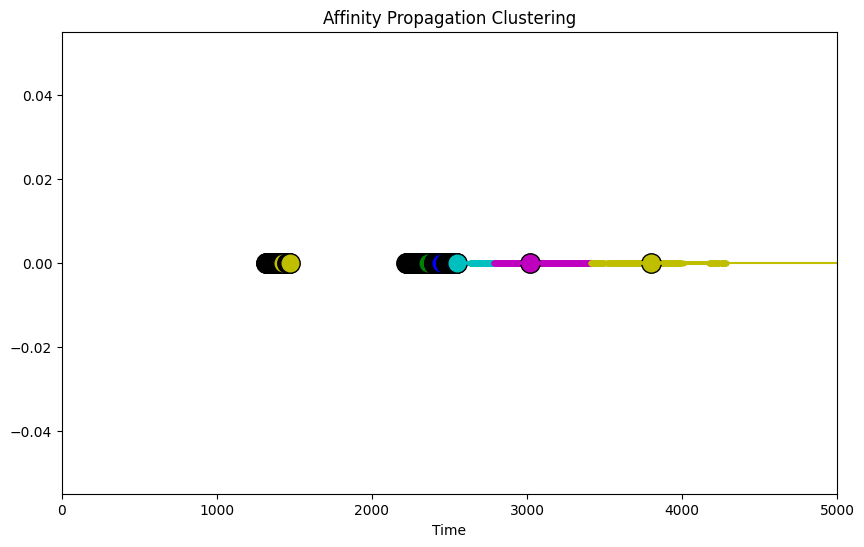

In [60]:
# 绘制每个聚类的图表
plt.figure(figsize=(10, 6))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(len(cluster_centers)), colors):
    class_members = clusters == k
    cluster_center = data[cluster_centers_indices[k]]
    plt.plot(data[class_members], np.zeros_like(data[class_members]), col + '.')
    plt.plot(cluster_center, 0, 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in data[class_members]:
        plt.plot([cluster_center, x], [0, 0], col)
plt.title('Affinity Propagation Clustering')
plt.xlabel('Time')

plt.xlim(0,5000)


plt.show()


In [61]:
# 创建一个字典来存储每个类的元素
cluster_elements = {}
for cluster_label in np.unique(clusters):
    cluster_elements[cluster_label] = []

# 将数据按照聚类标签分组
for i, cluster_label in enumerate(clusters):
    cluster_elements[cluster_label].append(data[i][0])

# 按照时间顺序输出每个类的元素
for cluster_label, elements in cluster_elements.items():
    sorted_elements = sorted(elements)
    print(f"Cluster {cluster_label} elements:", sorted_elements)

Cluster 0 elements: [1316]
Cluster 1 elements: [1317]
Cluster 2 elements: [1321]
Cluster 3 elements: [1322]
Cluster 4 elements: [1323]
Cluster 5 elements: [1324]
Cluster 6 elements: [1325]
Cluster 7 elements: [1326]
Cluster 8 elements: [1327]
Cluster 9 elements: [1328]
Cluster 10 elements: [1329]
Cluster 11 elements: [1331]
Cluster 12 elements: [1332]
Cluster 13 elements: [1333]
Cluster 14 elements: [1334]
Cluster 15 elements: [1335]
Cluster 16 elements: [1336]
Cluster 17 elements: [1337]
Cluster 18 elements: [1338]
Cluster 19 elements: [1339]
Cluster 20 elements: [1340]
Cluster 21 elements: [1341]
Cluster 22 elements: [1342]
Cluster 23 elements: [1343]
Cluster 24 elements: [1344]
Cluster 25 elements: [1345]
Cluster 26 elements: [1346]
Cluster 27 elements: [1347]
Cluster 28 elements: [1348]
Cluster 29 elements: [1349]
Cluster 30 elements: [1350]
Cluster 31 elements: [1351]
Cluster 32 elements: [1352]
Cluster 33 elements: [1353]
Cluster 34 elements: [1354]
Cluster 35 elements: [1355]
Cl

C:\Users\Administrator\AppData\Local\Temp\ipykernel_34688\382795628.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


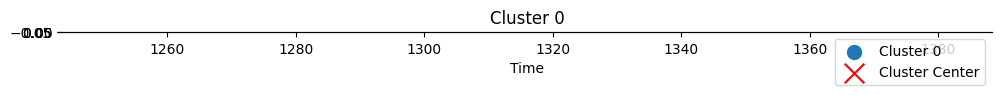

In [57]:
# 绘制每个聚类的图表
plt.figure(figsize=(12, 24))
for cluster_label in np.unique(clusters):
    cluster_points = data[clusters == cluster_label]
    plt.subplot(len(cluster_centers), 1, cluster_label + 1)
    plt.scatter(cluster_points, np.zeros_like(cluster_points), label=f'Cluster {cluster_label}', s=100)
    plt.scatter(cluster_centers[cluster_label], 0, c='red', marker='x', s=200, label='Cluster Center')
    plt.legend()
    plt.title(f'Cluster {cluster_label}')
    plt.xlabel('Time')
    break
plt.tight_layout()
plt.show()


## 数据集

In [47]:
def is_within(sorted_list, number, windowSize):
    """
    Checks if a number is within 10 of any number in a sorted list.

    Args:
      sorted_list: A sorted list of numbers.
      number: The number to check.

    Returns:
      True if the number is within 10 of any number in the list, False otherwise.
    """

    # Iterate over the sorted list.
    for item in sorted_list:
        # Check if the absolute difference between the number and the item is less than or equal to 10.
        # if abs(number - item) <= windowSize:
        if number > item + 70 and number < item + 90:
            # If so, return True.
            return True

    # If no match is found, return False.
    return False

In [49]:
import cv2
from tqdm import tqdm

video_path = r"Z:\Motion_Recognition\Head Twitch\3mgS_m2_0.22ml_cage11_4.avi"

imgsData = []
# 打开视频文件
cap = cv2.VideoCapture(video_path)
# 获取视频的总帧数
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

HTframsTag = [1280.4
    , 2213.64
    , 2599.8
    , 2899.92
    , 3141
    , 3321.96
    , 3650.16
    , 4115.28
    , 6183.96
    , 34830.12
    , 42983.64
    , 45993.6
    , 52773.84
    , 55512.72
    , 59120.88
    , 61223.52
    , 62333.88
    , 65197.8
    , 68922
    , 70737.6
    , 72085.8
    , 73293.36
    , 76385.4
    , 78190.8
    , 81351
    , 84020.76
    , 87323.88
    , 89262.48
    , 92095.44
    , 95011.32
    , 97250.04
    , 98656.56
    , 102918.84
    , 106437.96
    , 109877.04
    , 116836.32
    , 119790.24
    , 124755.84
    , 130982.88
    , 136433.64
    , 143275.8]
HTframsTag = [int(h) for h in HTframsTag]

# while True:
for step in tqdm(range(total_frames)):
    ret, prev_frame = cap.read()
    if not ret:
        break

    if is_within(HTframsTag, step, windowSize=240):
        cv2.imwrite(f"D:\Projects\mouseMotion_Recognition\data\source\HT/{step}.png", prev_frame)

    # cv2.imwrite(f"data/UltralyticsDataset/classify/train/Normal/{step}.png",prev_frame)



100%|█████████▉| 431881/431895 [41:47<00:00, 172.26it/s] 


In [2]:
%pwd
%cd data/UltralyticsDataset/classify

D:\Projects\mouseMotion_Recognition\data\UltralyticsDataset\classify


D:\Software\Develop\PythonEnv\anaconda3\envs\mouseMotion_Recognition\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


ffmpeg -i 呕吐合集.avi %d.png

In [94]:
from pathlib import Path
import os
import shutil
import numpy as np


def split_data_into_train_val_test(src_folder, train_folder, val_folder, test_folder, train_ratio=0.85, val_ratio=0.05,
                                   test_ratio=0.10):

    subfolders = [subfolder for subfolder in src_folder.iterdir() if subfolder.is_dir()]

    # 创建训练、验证、测试的文件夹路径
    train_folders = [train_folder / subfolder.name for subfolder in subfolders]
    val_folders = [val_folder / subfolder.name for subfolder in subfolders]
    test_folders = [test_folder / subfolder.name for subfolder in subfolders]
    # 创建相应的文件夹
    for folder in train_folders + val_folders + test_folders:
        folder.mkdir(parents=True, exist_ok=True)

    for src_folder_sub, train_folder, val_folder, test_folder in zip(subfolders,train_folders,val_folders,test_folders):
        # 获取源文件夹中所有的图片
        images = [img for img in src_folder_sub.iterdir() if img.is_file()]

        # 如果是 'Normal' 文件夹，我们只挑选一部分的图片
        if "Normal" in src_folder_sub.name:
            num_selected_images = 600
            images = np.random.choice(images, num_selected_images, replace=False)


        # 随机打乱图片
        np.random.shuffle(images)

        # 计算训练、验证和测试图片的个数
        num_images = len(images)
        num_train = int(num_images * train_ratio)
        num_val = int(num_images * val_ratio)
        num_test = num_images - num_train - num_val

        # 划分训练、验证和测试图片
        train_images = images[:num_train]
        val_images = images[num_train:num_train + num_val]
        test_images = images[num_train + num_val:]

        # 复制图片到相应的文件夹
        for img in train_images:
            shutil.copy(img, train_folder)
        for img in val_images:
            shutil.copy(img, val_folder)
        for img in test_images:
            shutil.copy(img, test_folder)


# 源文件夹路径
src_folder = Path('data/vomit/v1/source')

# 训练、验证和测试文件夹的路径
train_folder = Path(r'data/vomit/v1/vomit_v1_dataset/train')
val_folder = Path(r'data/vomit/v1/vomit_v1_dataset/val')
test_folder = Path(r'data/vomit/v1/vomit_v1_dataset/test')

# 划分数据集
split_data_into_train_val_test(src_folder, train_folder, val_folder, test_folder,val_ratio=0.1)

In [86]:
for a,b in zip([1,2,3],[10,11,12]):
    print(a,b)

1 10
2 11
3 12
